In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the processed data
df = pd.read_csv('../data/processed/processed_fraudlock_data.csv')

In [3]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,isHighAmount,isTransferOrCashout,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1.455192e-11,9839.64,0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1.136868e-12,1864.28,0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0.000000e+00,181.00,0,1,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,0.000000e+00,21363.00,0,1,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.000000e+00,11668.14,0,0,0,0,0,1,0


In [4]:
# Step 3: Define Features and Target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
# Step 5: Train Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predictions
y_pred = clf.predict(X_test)

# Step 7: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



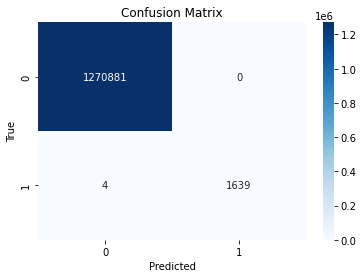

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
import joblib

joblib.dump(clf, '../outputs/models/fraudlock_rf_model.pkl')

print("Model saved to outputs/models/fraudlock_rf_model.pkl")


Model saved to outputs/models/fraudlock_rf_model.pkl


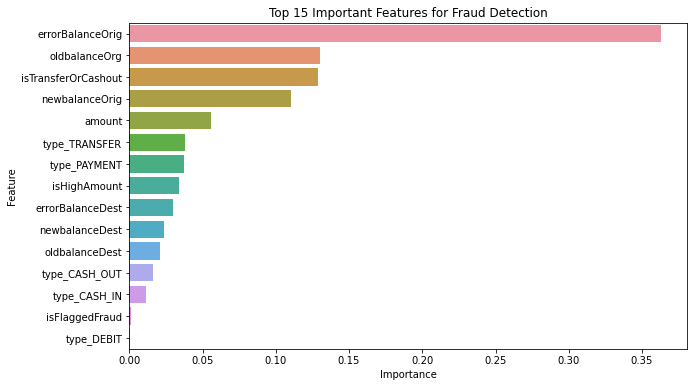

In [8]:
# Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15))  # Top 15 features
plt.title('Top 15 Important Features for Fraud Detection')
plt.show()


Classification Report (Improved):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



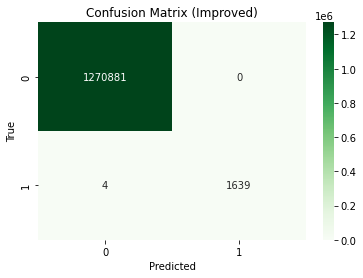

In [9]:
# Slightly Improved Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_improved = RandomForestClassifier(
    n_estimators=300,       # more trees
    max_depth=12,           # allow slightly deeper trees
    min_samples_split=5,    # smaller splits allowed
    min_samples_leaf=2,     # smaller leaves allowed
    class_weight='balanced', 
    random_state=42
)

# Train
clf_improved.fit(X_train, y_train)

# Predict
y_pred_improved = clf_improved.predict(X_test)

# Evaluate
print("Classification Report (Improved):")
print(classification_report(y_test, y_pred_improved, zero_division=0))

# Confusion Matrix
cm_improved = confusion_matrix(y_test, y_pred_improved)
plt.figure(figsize=(6,4))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Improved)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [10]:
joblib.dump(clf_improved, '../outputs/models/fraudlock_rf_model(modified).pkl')

print("Model saved to outputs/models/fraudlock_rf_model(modified).pkl")


Model saved to outputs/models/fraudlock_rf_model(modified).pkl
